In [1]:
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np

np.random.seed(3)

Using TensorFlow backend.


In [0]:
# 1. 데이터셋 생성하기

# 훈련셋과 시험셋 불러오기
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 훈련셋과 검증셋 분리
x_val = x_train[50000:]
y_val = y_train[50000:]
x_train = x_train[:50000]
y_train = y_train[:50000]

# 데이터셋 전처리
x_train = x_train.reshape(50000, 784).astype('float32') / 255.0
x_val = x_val.reshape(10000, 784).astype('float32') / 255.0
x_test = x_test.reshape(10000, 784).astype('float32') / 255.0

# 훈련셋과 검증셋 고르기
train_rand_idxs = np.random.choice(50000, 700)
val_rand_idxs = np.random.choice(10000, 300)
x_train = x_train[train_rand_idxs]
y_train = y_train[train_rand_idxs]
x_val = x_val[val_rand_idxs]
y_val = y_val[val_rand_idxs]

# 라벨데이터 원핫인코딩 (one-hot encoding) 처리
y_train = np_utils.to_categorical(y_train)
y_val = np_utils.to_categorical(y_val)
y_test = np_utils.to_categorical(y_test)

In [0]:
# 2. 모델 구성하기
model = Sequential()
model.add(Dense(units=2, input_dim=28*28, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

In [0]:
# 3. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [25]:
# 4. 모델 학습시키기 (콜백함수 이용)
custom_hist = CustomHistory()
custom_hist.init()

for epoch_idx in range(1000):
  print('epochs : ' + str(epoch_idx))
  model.fit(x_train, y_train, epochs=1, batch_size=10, validation_data=(x_val, y_val),
            callbacks=[custom_hist])

epochs : 0
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 196us/step - loss: 2.2658 - accuracy: 0.1357 - val_loss: 2.2255 - val_accuracy: 0.2100
epochs : 1
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 126us/step - loss: 2.1715 - accuracy: 0.2100 - val_loss: 2.1289 - val_accuracy: 0.2533
epochs : 2
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 129us/step - loss: 2.0850 - accuracy: 0.2500 - val_loss: 2.0624 - val_accuracy: 0.2633
epochs : 3
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 134us/step - loss: 2.0218 - accuracy: 0.2600 - val_loss: 2.0147 - val_accuracy: 0.2533
epochs : 4
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 130us/step - loss: 1.9695 - accuracy: 0.2657 - val_loss: 1.9706 - val_accuracy: 0.2800


In [7]:
# 4. 모델 학습시키기 (기본)
hist = model.fit(x_train, y_train, epochs=1000, batch_size=10, validation_data=(x_val, y_val))

Train on 700 samples, validate on 300 samples
Epoch 1/1000
700/700 [==============================] - 0s 463us/step - loss: 2.2780 - accuracy: 0.1443 - val_loss: 2.2515 - val_accuracy: 0.1933
Epoch 2/1000
700/700 [==============================] - 0s 158us/step - loss: 2.1983 - accuracy: 0.2357 - val_loss: 2.1935 - val_accuracy: 0.2167
Epoch 3/1000
700/700 [==============================] - 0s 146us/step - loss: 2.1330 - accuracy: 0.2314 - val_loss: 2.1433 - val_accuracy: 0.2267
Epoch 4/1000
700/700 [==============================] - 0s 142us/step - loss: 2.0774 - accuracy: 0.2386 - val_loss: 2.1000 - val_accuracy: 0.2267
Epoch 5/1000
700/700 [==============================] - 0s 142us/step - loss: 2.0237 - accuracy: 0.2371 - val_loss: 2.0588 - val_accuracy: 0.2433
Epoch 6/1000
700/700 [==============================] - 0s 153us/step - loss: 1.9798 - accuracy: 0.2457 - val_loss: 2.0344 - val_accuracy: 0.2300
Epoch 7/1000
700/700 [==============================] - 0s 137us/step - loss: 

In [13]:
print(hist.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


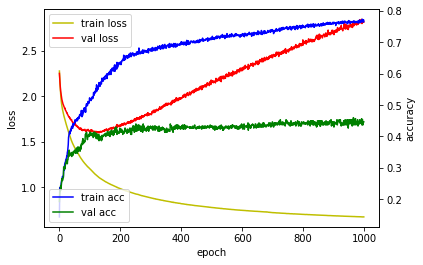

In [26]:
# 5. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [0]:
import keras

In [17]:
# 4. 모델 학습시키기 (텐서보드)
tb_hist = keras.callbacks.TensorBoard(log_dir='./graph', histogram_freq=0, write_grads=True,
                                      write_images=True)
model.fit(x_train, y_train, epochs=1000, batch_size=10, validation_data=(x_val, y_val), callbacks=[tb_hist])

Train on 700 samples, validate on 300 samples
Epoch 1/1000
700/700 [==============================] - 0s 176us/step - loss: 0.6770 - accuracy: 0.7700 - val_loss: 2.8495 - val_accuracy: 0.4433
Epoch 2/1000
 10/700 [..............................] - ETA: 0s - loss: 0.6017 - accuracy: 0.6000

/usr/local/lib/python3.6/dist-packages/keras/callbacks/tensorboard_v2.py:97: UserWarning: The TensorBoard callback does not support gradients display when using TensorFlow 2.0. The `write_grads` argument is ignored.
  warnings.warn('The TensorBoard callback does not support '


700/700 [==============================] - 0s 152us/step - loss: 0.6774 - accuracy: 0.7671 - val_loss: 2.8171 - val_accuracy: 0.4400
Epoch 3/1000
700/700 [==============================] - 0s 153us/step - loss: 0.6762 - accuracy: 0.7714 - val_loss: 2.8333 - val_accuracy: 0.4433
Epoch 4/1000
700/700 [==============================] - 0s 147us/step - loss: 0.6766 - accuracy: 0.7614 - val_loss: 2.8550 - val_accuracy: 0.4467
Epoch 5/1000
700/700 [==============================] - 0s 146us/step - loss: 0.6771 - accuracy: 0.7643 - val_loss: 2.8224 - val_accuracy: 0.4400
Epoch 6/1000
700/700 [==============================] - 0s 146us/step - loss: 0.6766 - accuracy: 0.7671 - val_loss: 2.8438 - val_accuracy: 0.4400
Epoch 7/1000
700/700 [==============================] - 0s 145us/step - loss: 0.6763 - accuracy: 0.7671 - val_loss: 2.8641 - val_accuracy: 0.4433
Epoch 8/1000
700/700 [==============================] - 0s 152us/step - loss: 0.6761 - accuracy: 0.7686 - val_loss: 2.8463 - val_accuracy

In [18]:
!tensorboard --logdir=./Projects/Keras_writing/graph

2020-04-27 13:55:53.020384: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
Serving TensorBoard on localhost; to expose to the network, use a proxy or pass --bind_all
TensorBoard 2.2.1 at http://localhost:6006/ (Press CTRL+C to quit)
^C


In [0]:
# 사용자 정의 히스토리 클래스 정의
class CustomHistory(keras.callbacks.Callback):
  def init(self):
    self.train_loss = []
    self.val_loss = []
    self.train_acc = []
    self.val_acc = []

  def on_epoch_end(self, batch, logs={}):
    self.train_loss.append(logs.get('loss'))
    self.val_loss.append(logs.get('val_loss'))
    self.train_acc.append(logs.get('acc'))
    self.val_acc.append(logs.get('val_acc'))